<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'></th>
        <th style="text-align:center;"><h1>DDV Assignment 2</h1><h2>Heng Jue Wei Tevin S10260014E</h2></th>
    </tr>
</table>

# Cardio Good Fitness Data Exploration & Visualization



# Table of Contents
1. [Introduction](#introduction)  

2. [Primary Objectives](#Primary-objectives)
   - [Background information on my Stakeholder](#background)  
   - [List of Exploratory Questions](#List-of-Exploratory-Questions)

4. [Data Preparation](#Data-Preparartion)

5. [Exploratory Data Analysis and Visualisation](#Exploratory-Data-Analysis-and-Visualisation)

6. [Dashboard](#Dashboard)

7. [How they can move forward?](#How-they-Can-Move-Forward?)

8. [Summary](#Summary)


# 1. Introduction


This dataset provides customer insights for a fitness equipment company that sells treadmills. The data includes demographic details such as age, gender, education, marital status, and income, along with fitness-related attributes like treadmill usage, fitness level, and miles run per week. Understanding these patterns can help the company refine its product offerings, optimize marketing efforts, and improve customer experience.

# 2) Primary Objectives

## Chosen Stakeholder: Marketing and Sales Teams

### Why they should care?
The Marketing and Sales Teams play a crucial role in driving the company's revenue by identifying customer needs, developing promotional campaigns, and optimizing sales strategies. They leverage data insights to understand purchasing behaviors, target the right audience, and enhance customer engagement. By analyzing customer demographics, fitness levels, and spending patterns, the teams can design tailored advertising strategies, improve customer retention, and boost overall sales performance.

### List of Exploratory Questions
General Product Analysis  
    1. Which treadmill model (TM195, TM498, TM798) is the most popular among customers?  
    2. How does the income distribution vary across different treadmill models?  
    3. Do customers with higher self-rated fitness levels prefer a specific treadmill model?  
    5. Which treadmill model is associated with the highest average miles walked/run per week?  

Demographic Analysis  
6. What is the age distribution of customers purchasing treadmills?  
7. Is there a significant difference in treadmill preference based on gender?  
8. How does marital status influence treadmill choice?  
9. Do customers with different education levels prefer specific treadmill models?  
10. How does annual income vary between single and married customers?  

 Behavioral Analysis  
11. What is the relationship between usage frequency and miles walked/run per week for different treadmill models?  
12. Does higher income correlate with more treadmill usage per week?  
15. Do higher fitness levels correspond to higher treadmill usage?                 
 Regional and Correlation Insights  
16. Which region has the highest number of treadmill purchases?  
17. What are the strongest correlations between numeric variables (e.g., age, income, fitness, miles)?  
18. Does income influence the number of miles walked/run per week differently for men and women?  
19. Is there a noticeable relationship between education level and fitness level?  
20. How do age and fitness level correlate with each other?

# 3) Data Preparation

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

%matplotlib inline

In [7]:
df = pd.read_csv("cardio_good_fitness.csv")
df

,Product,Branch,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,West,18,Male,14,Single,NaN,4,29562,112
1,TM195,East,19,Male,15,Single,2,3,31836,75
2,TM195,West,19,Female,14,P,4,3,30699,66
3,TM195,South,na,na,na,na,na,na,na,na
4,TM195,West,19,Male,12,S,NaN,3,32973,85
...,...,...,...,...,...,...,...,...,...,...
178,TM798,East,40,Male,21,Single,6,5,83416,200
179,TM798,West,42,Male,18,Single,5,4,89641,200
180,TM798,East,45,Male,16,S,5,5,90886,160
181,TM798,North,47,Male,18,Partnered,4,5,104581,120


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        183 non-null    object
 1   Branch         183 non-null    object
 2   Age            180 non-null    object
 3   Gender         183 non-null    object
 4   Education      183 non-null    object
 5   MaritalStatus  183 non-null    object
 6   Usage          175 non-null    object
 7   Fitness        183 non-null    object
 8   Income         183 non-null    object
 9   Miles          183 non-null    object
dtypes: object(10)
memory usage: 14.4+ KB


In [9]:
print("Initial Dataset")
print(df.isnull().sum())

Initial Dataset
Product          0
Branch           0
Age              3
Gender           0
Education        0
MaritalStatus    0
Usage            8
Fitness          0
Income           0
Miles            0
dtype: int64


In [10]:
list_columns_to_fix = ['Age', 'Usage', 'Fitness','Education','Income','Miles']
for col in list_columns_to_fix:
    df[col] = df[col].replace('na', np.nan)

df['MaritalStatus'] = df['MaritalStatus'].replace(['na'], np.nan)
df['Gender'] = df['Gender'].replace(['na'], np.nan)

#Convert these columns to numeric
for col in list_columns_to_fix:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#Fill missing values of numeric columns with their median
for col in list_columns_to_fix:
    df[col] = df[col].fillna(df[col].median())

#Drop rows where MaritalStatus and Gender is NaN
df = df.dropna(subset=['MaritalStatus'])
df = df.dropna(subset=['Gender'])


#Final dataset
print("Final dataset after cleaning")
print(df.isnull().sum())

print("\nDataset Info")
print(df.info())
print("\n")
print(df.head(10))

Final dataset after cleaning
Product          0
Branch           0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Dataset Info
<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        180 non-null    object 
 1   Branch         180 non-null    object 
 2   Age            180 non-null    float64
 3   Gender         180 non-null    object 
 4   Education      180 non-null    float64
 5   MaritalStatus  180 non-null    object 
 6   Usage          180 non-null    float64
 7   Fitness        180 non-null    float64
 8   Income         180 non-null    float64
 9   Miles          180 non-null    float64
dtypes: float64(6), object(4)
memory usage: 15.5+ KB
None


   Product Branch   Age  Gender  Education MaritalStatus  Usage  F

### Changing data types

In [12]:
print("---- Data Types Before Correction ----")
print(df.dtypes)

---- Data Types Before Correction ----
Product           object
Branch            object
Age              float64
Gender            object
Education        float64
MaritalStatus     object
Usage            float64
Fitness          float64
Income           float64
Miles            float64
dtype: object


In [13]:
#Converting numeric columns to 'Integer' data type
numeric_columns = ['Age', 'Education','Usage', 'Income','Miles', 'Fitness']
for col in numeric_columns:
    if all(df[col].dropna().apply(float.is_integer)):
        df[col] = df[col].astype(int)
    else:
        df[col] = df[col].astype(float)

        
#Converting Categorical columns to 'category' data type
categorical_columns = ['Product', 'Branch', 'Gender', 'MaritalStatus']
for col in categorical_columns:
    df[col] = df[col].astype('category')

print("\n---- Data Types After Correction ----")
print(df.dtypes)


---- Data Types After Correction ----
Product          category
Branch           category
Age                 int32
Gender           category
Education           int32
MaritalStatus    category
Usage               int32
Fitness             int32
Income              int32
Miles               int32
dtype: object


### Fixing inconsistent labels

In [15]:
#Standardizing Marital Status labels
df['MaritalStatus'] = df['MaritalStatus'].replace({'S': 'Single', 'P': 'Partnered'})

#Standardizing Gender labels
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'})

#Check if there are any inconsistencies
print("=== Unique Values After Label Fixes ===")
print("MaritalStatus:", df['MaritalStatus'].unique())
print("Gender:", df['Gender'].unique())

=== Unique Values After Label Fixes ===
MaritalStatus: ['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']
Gender: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']


C:\Users\User\AppData\Local\Temp\ipykernel_11352\3107359610.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['MaritalStatus'] = df['MaritalStatus'].replace({'S': 'Single', 'P': 'Partnered'})


# 3) Exploratory Data Analysis and Visualisation

## 1. Which treadmill model (TM195, TM498, TM798) is the most popular among customers?

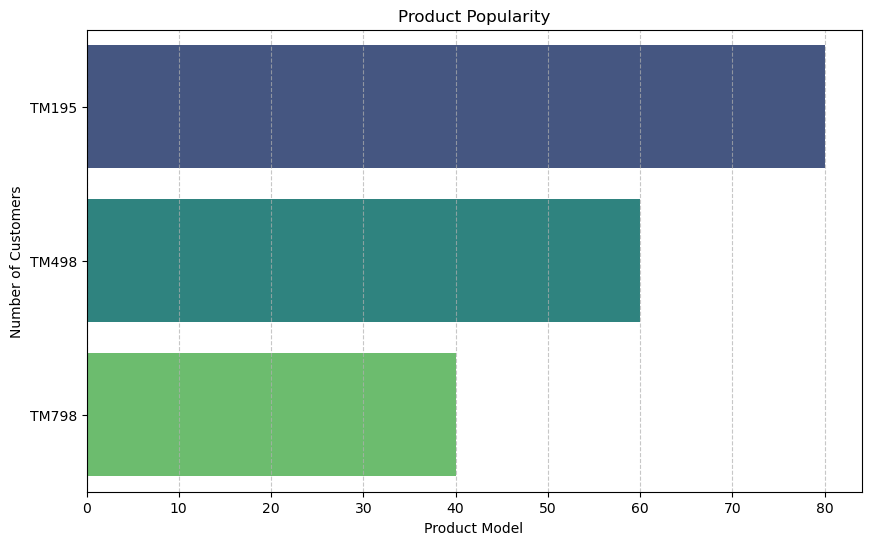

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Product', data=df, hue='Product', palette='viridis', legend=False)
plt.title('Product Popularity')
plt.xlabel('Product Model')
plt.ylabel('Number of Customers')
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.show()

### Understanding this visual

This bar chart visualizes product popularity by showing the number of customers for each treadmill model (TM195, TM498, TM798).

1) **Understanding Product demand**
   - TM195 is the most popular product with the highest number of customers. Followed by TM498 with moderate popularity, and TM798 is the least popular.
   - Sales teams can prioritize top-selling products (TM195) while investigating why TM798 has fewer customers.

2) **Optimizing Marketing Strategies**
    - Boosting promotions for lower-Selling products. Since TM798 is the least popular, the Sales team will have to get feedbacks on TM798 to have a better understanding of why it is very unpopular. 

## 2. How does the income distribution vary across different treadmill models?

C:\Users\User\AppData\Local\Temp\ipykernel_11352\1518662047.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby('Product')['Income'].median()


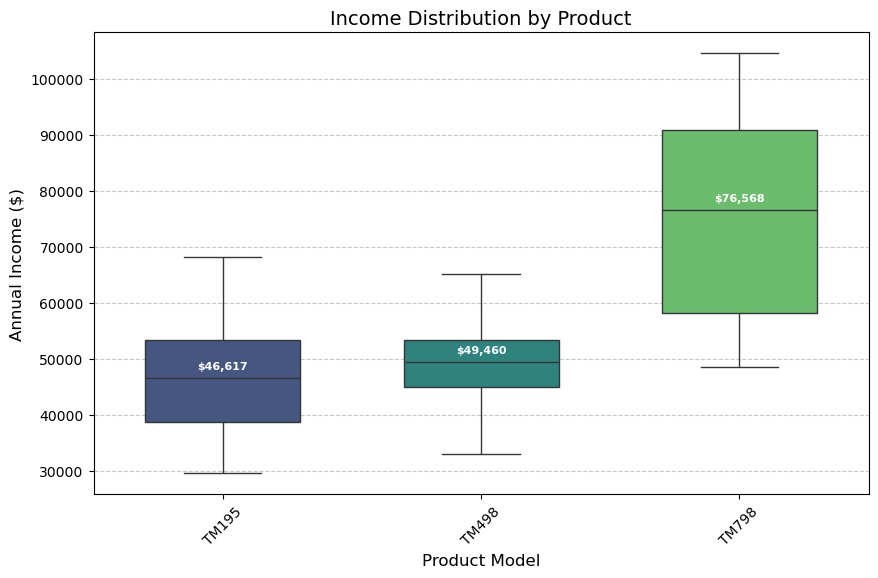

In [21]:
plt.figure(figsize=(10, 6))  

ax = sns.boxplot(
    x='Product', 
    y='Income', 
    data=df, 
    hue = 'Product',
    palette='viridis',
    legend = False,
    showfliers=False,  
    width=0.6  
)

medians = df.groupby('Product')['Income'].median()  

for i, median in enumerate(medians):
    ax.annotate(f'${median:,.0f}',  
                xy=(i, median), 
                xytext=(0, 5),  
                textcoords='offset points', 
                ha='center', 
                va='bottom',
                fontsize=8, 
                fontweight='bold', 
                color='white')

plt.title('Income Distribution by Product', fontsize=14)
plt.xlabel('Product Model', fontsize=12)
plt.ylabel('Annual Income ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.xticks(rotation=45)  

plt.show()

### Explanation

The boxplot shows the median, interquartile range (IQR) of customer income for each treadmill model.

**Why choose a boxplot?**
- Boxplot highlights variability and outliers in customer income.
- It’s easy to compare different treadmill models side by side.
- A boxplot keeps the visualization clean and uncluttered, making it easy to spot trends.

**Insights from this Visual**
- *Higher-Income Customers Prefer the TM798 Model (Premium Treadmill)*
  - The boxplot indicates that customers purchasing the TM798 treadmill have significantly higher median incomes compared to those purchasing the other two models.
  - The income range (interquartile range, IQR) for TM798 customers is higher, meaning that most customers in this category belong to a higher-income bracket.

- *How This Helps the Marketing & Sales Teams*
    - Marketing teams can position the TM798 model as a luxury or high-performance product catering to customers who are willing to invest in top-tier fitness equipment.
    - Since higher-income individuals are often influenced by branding and exclusivity, marketers can use premium branding, celebrity endorsements, and high-end advertising channels. For example, magazines, luxury fitness clubs, and high-income social media influencers.
    - Sales teams can prioritize affluent neighborhoods, high-end gyms, and corporate wellness programs when promoting this product. They can also offer personalized consultations or in-home demos to appeal to high-net-worth individuals.

- *Lower-Income Customers Prefer TM195 and TM498 Models*
    - The boxplot reveals that customers purchasing TM195 and TM498 have lower median incomes than those buying TM798.
    - These models have a narrower income range, meaning the majority of buyers fall within a similar income bracket.


- *How This Helps the Marketing & Sales Teams*
    - Since these treadmills appeal to price-sensitive customers, the marketing team can emphasize discounts, bundle deals, and seasonal sales promotions to attract budget-conscious buyers.
    - Marketing should focus on social media ads, search engine promotions, and email marketing campaigns targeting middle-income households.
    - Lower-income customers often purchase from large retail stores, online marketplaces, and installment-based financing programs. The sales team should ensure strong partnerships with retailers, e-commerce platforms, and fitness subscription services.
    -  Unlike premium customers who look for advanced features, price-sensitive customers care about affordability, durability, and practicality. Marketing should emphasize how TM195 and TM498 offer the best value for money while still providing essential fitness features.


## 3) What are the gender proportions for each treadmill models?

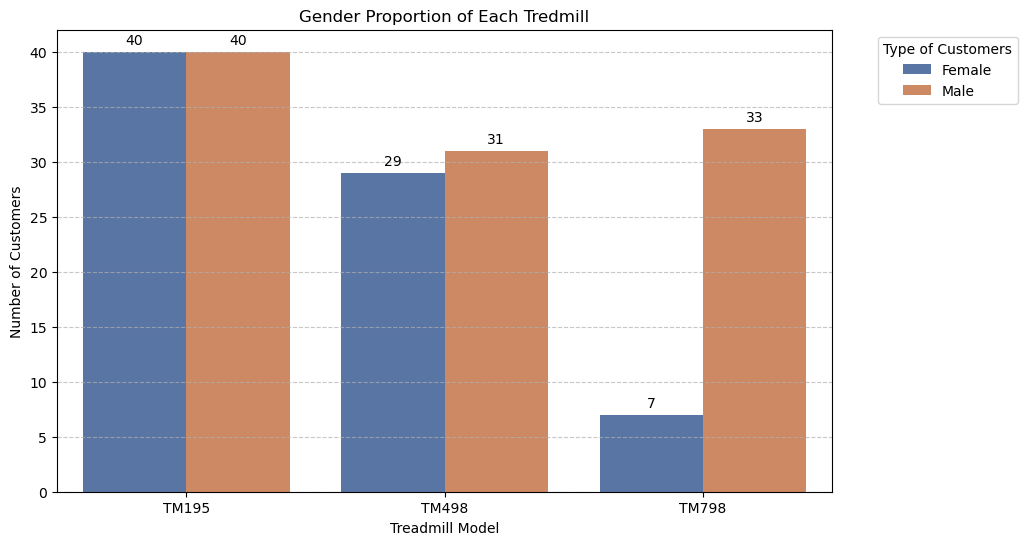

In [24]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Product', hue='Gender', palette='deep')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color = 'black')
plt.title('Gender Proportion of Each Tredmill')
plt.xlabel('Treadmill Model')
plt.ylabel('Number of Customers')
plt.legend(title='Type of Customers', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Explanation 

The gender distribution bar chart for each treadmill model provide valuable insights into the purchasing preferences of male and female customers. These insights can help the marketing and sales teams refine their targeting strategies, tailor advertising campaigns, and optimize product positioning to attract the right audience.

**Insights from this visual**
- *TM195*
  - The TM195 treadmill has an equal count between male and female customers (40 each).
  - This suggests that both genders find this treadmill equally appealing.

- *How will this help the Marketing & Sales Team*
    - Since TM195 appeals equally to both men and women, marketing campaigns should highlight universal benefits such as durability, ease of use, and health benefits.
    - It can be positioned as a household-friendly treadmill for couples or families looking to stay fit together since it attracts a broad audience.
    - Partnerships with both male and female fitness influencers can help reach a diverse audience.

- *TM498*
    - TM498 has a slightly higher proportion of male buyers compared to female buyers.
- *How will this help the Marketing & Sales Team*
    - Marketing should continue appealing to both men and women, but with a slight emphasis on performance-driven messaging for male buyers.
    - Males tend to prioritize performance metrics, so marketing campaigns should emphasize stability, running speed, and endurance features.

- *TM798*
    - Strong male preference with a significant male count at 33, while female buyers count is at 7.
    - This indicates that men are much more likely to purchase this premium treadmill, possibly due to its advanced features, power, or branding as a high-performance machine.

- *How will this help the Marketing & Sales Team*
    - Marketing should target male athletes, gym-goers, and fitness enthusiasts who seek high-end workout equipment.
    - Ads should emphasize strength, endurance, and elite performance—using imagery of male athletes and intense workouts.
    - Collaborating with male fitness trainers, popular male fitness influencers, and professional athletes can increase product appeal.

## 4) What is the fitness rating across each treadmill models?

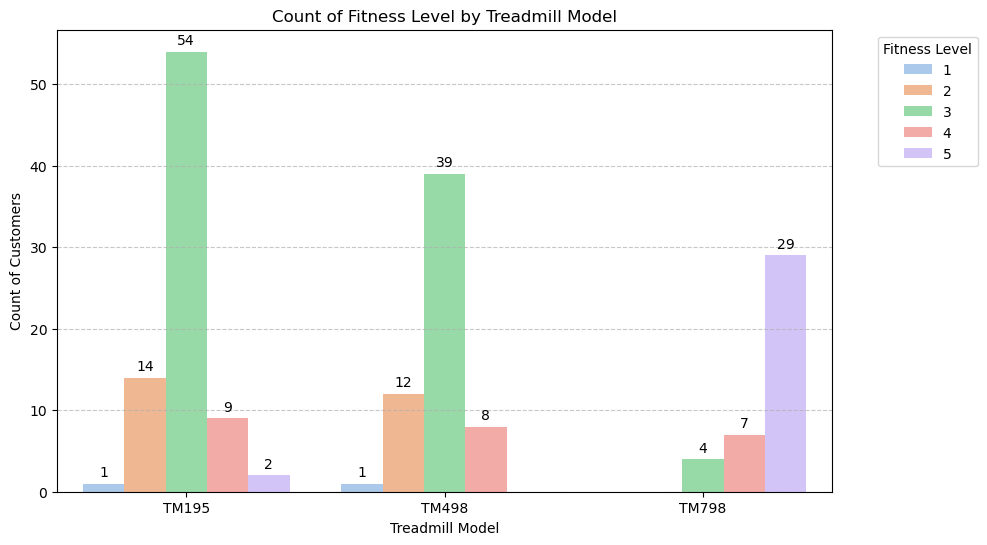

In [27]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Product', hue='Fitness', palette = 'pastel')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color = 'black')

plt.title('Count of Fitness Level by Treadmill Model')
plt.xlabel('Treadmill Model')
plt.ylabel('Count of Customers')
plt.legend(title='Fitness Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Explanation
The bar chart illustrates the distribution of customer fitness levels for each treadmill model, providing key insights into which treadmills appeal to different fitness segments. Understanding these trends allows the marketing and sales teams to refine their messaging, target the right audience, and enhance customer engagement strategies.

**Insights from this visual**
- *TM195*
  - The highest count of customers (54) using TM195 have a fitness level of 3, indicating that most users are at a moderate fitness level.
  - A smaller portion (9 customers) have a fitness level of 4, meaning that some users are above average in fitness.
    
- *How will this help the Marketing & Sales Team*
    - Since TM195 is most popular among users with moderate fitness levels, marketing should position it as a starter treadmill for people looking to stay active.
    - The significant number customers with fitness level 2 or 3 suggests that many users are new to treadmill workouts, so marketing campaigns should focus on ease of use, affordability, and beginner-friendly features.
    - Since very few highly fit individuals (level 5) use TM195, sales teams should avoid promoting it as a high-performance treadmill and instead highlight its value for casual users.

- *TM498*
    - Like TM195, the majority of TM498 users (39 customers) have a fitness level of 3, indicating that it is also popular among moderate fitness users.
    - Like TM195, very few people have fitness levels of 1 or 5, meaning it is rarely used by extreme fitness beginners or highly athletic users.

- *How will this help the Marketing & Sales Team*
    - Since TM498 has a similar audience but slightly fewer beginners, marketing should position it as a step up for those looking to improve their fitness.
    - The product page and advertisements can focus on features that cater to users transitioning from beginner to intermediate workouts. For example, adjustable incline, better cushioning

- *TM798*
    - Unlike the other models, TM798 has a majority of customers (29) with a fitness level of 5, indicating that it is primarily used by highly athletic individuals.

- *How will this help the Marketing & Sales Team*
    - TM798 should be marketed as a high-performance treadmill for serious fitness enthusiasts, runners, and athletes.
    - Marketing can collaborate with fitness trainers, influencers, or professional athletes to endorse the product.
    - Sales teams should emphasize speed, incline variations, durability, and smart connectivity features that cater to high-intensity workouts.
    - Marketing should also focus on professional trainers or gym facilities willing to invest in premium equipment.

## 5) What does the customer demographic look like across various regions

C:\Users\User\AppData\Local\Temp\ipykernel_11352\2913565733.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_income_per_region = df.groupby("Branch")["Income"].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_11352\2913565733.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  married_percentage = (df[df['MaritalStatus'] == 'Partnered'].groupby('Branch').size() / df.groupby('Branch').size()) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_11352\2913565733.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False

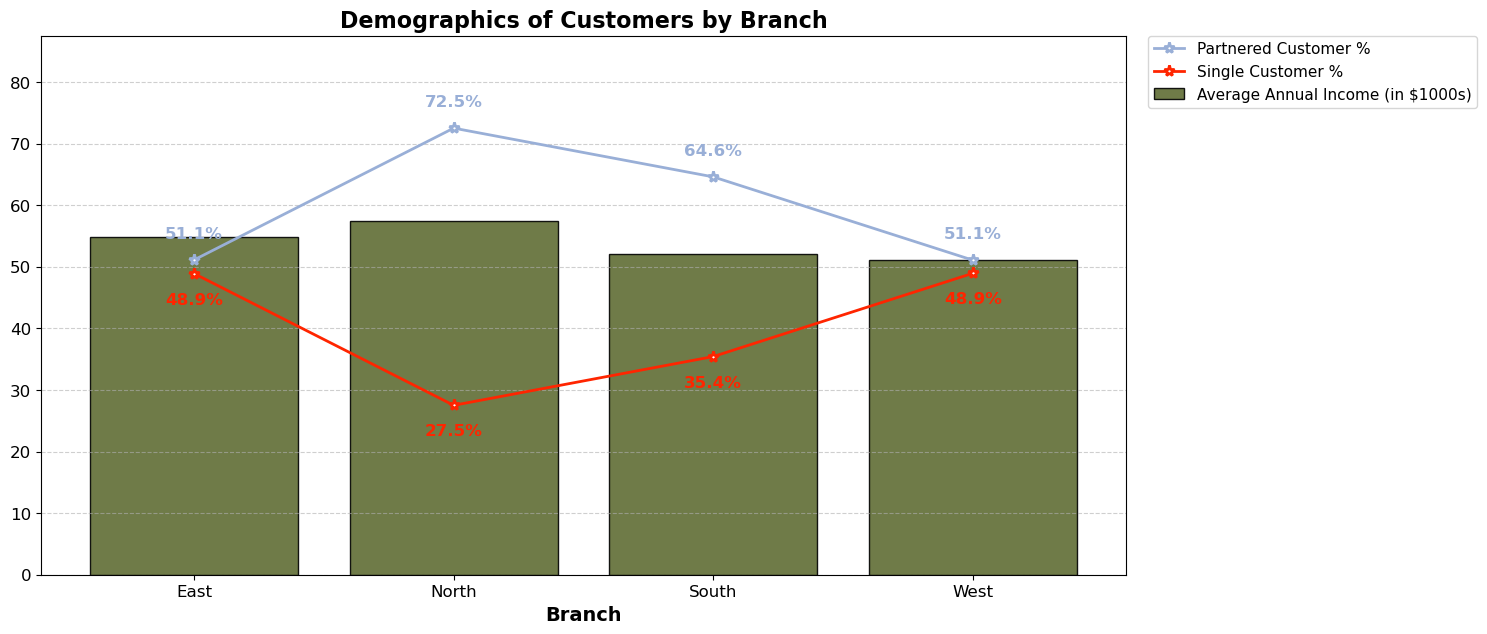

In [30]:
fig, ax = plt.subplots(figsize=(14, 7))

branches = df['Branch'].unique() 
average_income_per_region = df.groupby("Branch")["Income"].mean()
married_percentage = (df[df['MaritalStatus'] == 'Partnered'].groupby('Branch').size() / df.groupby('Branch').size()) * 100
single_percentage = (df[df['MaritalStatus'] == 'Single'].groupby('Branch').size() / df.groupby('Branch').size()) * 100


ax.bar(average_income_per_region.index,  
       average_income_per_region.values / 1000,  
       label="Average Annual Income (in $1000s)", 
       color='#5F6D34', alpha=0.9, edgecolor='black')

ax.plot(married_percentage, 
        marker='*', 
        linestyle='-', 
        color= '#99AFD7', 
        linewidth=2, 
        markersize=8, 
        label="Partnered Customer %", 
        markerfacecolor='white', 
        markeredgewidth=2, 
        markeredgecolor='#99AFD7')

ax.plot(single_percentage, 
        marker='*', 
        linestyle='-', 
        color='#FF2500', 
        linewidth=2, 
        markersize=8, 
        label="Single Customer %", 
        markerfacecolor='white', 
        markeredgewidth=2, 
        markeredgecolor='#FF2500')

for i, txt in enumerate(married_percentage):
    ax.text(i, txt + 3, f"{txt:.1f}%", ha='center', va='bottom', 
            fontsize=12, fontweight='bold', color='#99AFD7')

for i, txt in enumerate(single_percentage):
    ax.text(i, txt - 3, f"{txt:.1f}%", ha='center', va='top', 
            fontsize=12, fontweight='bold', color='#FF2500')


ax.set_ylim(0, max(single_percentage.max(), married_percentage.max()) + 15)
# Labels and title
ax.set_xlabel("Branch", fontsize=14, fontweight='bold')
ax.set_title("Demographics of Customers by Branch", fontsize=16, fontweight='bold')
ax.legend(frameon=True, fontsize=11, loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)

plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Explanation**

This visual provides a comprehensive analysis of customer demographics by branch, specifically focusing on marital status distribution and average annual income. For the Marketing & Sales team, this chart is valuable in shaping targeted strategies and optimizing branch-specific sales efforts.

- *Customer Segmentation for Targeted Marketing*

North Branch: It has the highest proportion of partnered customers (72.5%). Marketing messages for this region can emphasize family-oriented or couple-based offers, such as "Fitness for Two" packages or discounts for household purchases.

West & East Branches: The customer mix is almost balanced (51.1% partnered, 48.9% single). The team can diversify marketing strategies, offering promotions suited for both single and partnered customers.

South Branch: Shows a more gradual shift, with 35.4% single customers. If single customers are more inclined towards individualized training programs, these should be highlighted in promotional materials.

- *Regional Pricing and Product Positioning*
  
If a branch has customers with higher annual income, premium-priced treadmills or memberships can be promoted.
Whereas if a branch has a more price-sensitive audience, offering installment plans or discounts may be more effective.


## 6) Is there any correlation between Customer's Education level and Income?

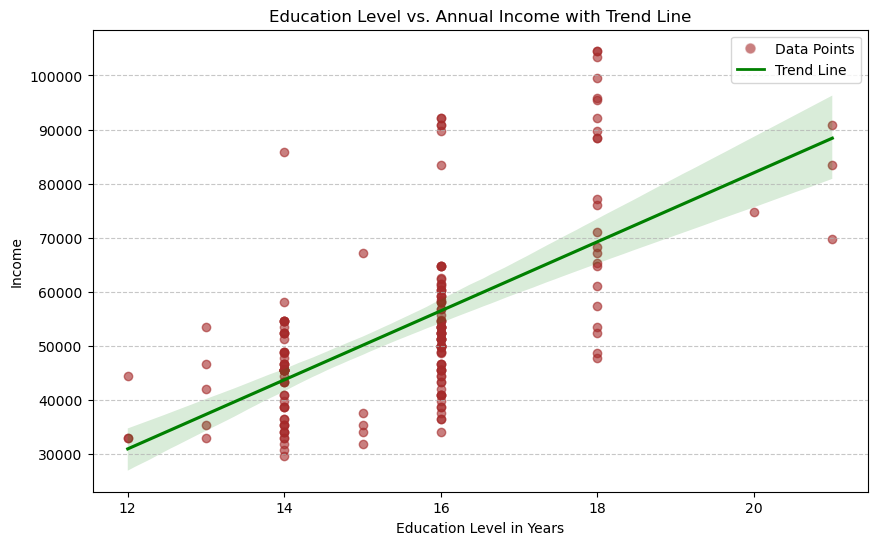

In [136]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(data=df, x='Education', y='Income', scatter_kws={'alpha':0.6, 'label': 'Data Points', 'color':'brown'}, line_kws={'color':'green'})
scatter_legend = plt.Line2D([0], [0], marker='o', color='w', markersize=8, markerfacecolor='brown', alpha=0.6, label='Data Points')
line_legend = plt.Line2D([0], [0], color='green', linewidth=2, linestyle='-', label='Trend Line')
plt.title('Education Level vs. Annual Income with Trend Line')
plt.xlabel('Education Level in Years')
plt.ylabel('Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(handles=[scatter_legend, line_legend])
plt.show()

**Explanation**

- The scatter plot with a regression line illustrates the relationship between education level and annual income, helping us understand how education influences earning potential.

- This visualization is valuable for stakeholders as it provides a data-driven perspective on income trends, enabling better decision-making for marketing, sales, and recruitment strategies.

- The regression line indicates a weak positive correlation, meaning that individuals with more years of education tend to earn higher incomes.
However, there is significant variation around the trend line, showing that not everyone with a higher education level earns significantly more.

- Some individuals with fewer years of education still achieve high incomes, suggesting that other factors influence earning potential.

*How will this help the Marketing & Sales Team*
- Since higher education is loosely linked to higher income, marketing can tailor messaging and promotions for customers in higher-income brackets who may be more willing to invest in premium offerings.

- If education level affects purchasing power, sales teams can adjust pricing, payment plans, or financing options to match different income segments. For example, offering student discounts for students who want to get fit while studying in tertiary institution.

## 7) Which branch has the most amount of sales?

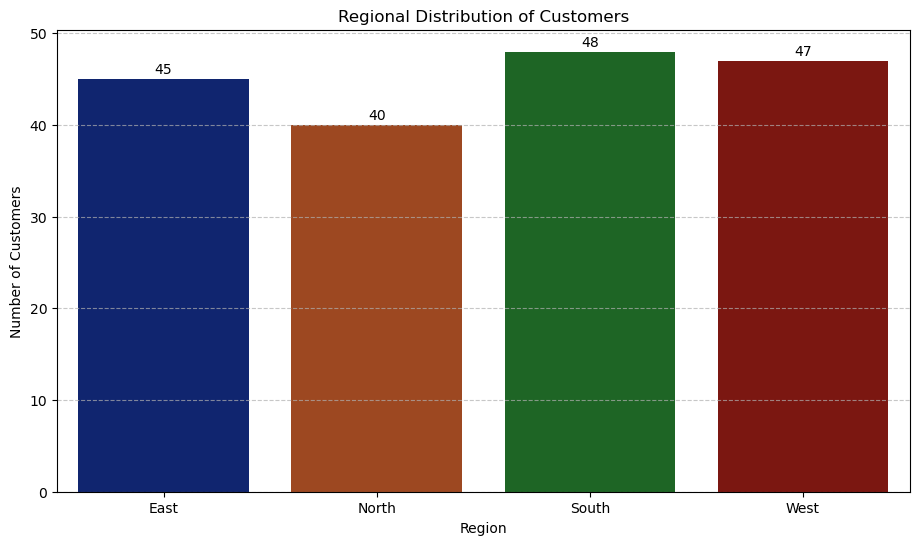

In [36]:
# Regional Distribution
plt.figure(figsize=(11, 6))
branch_counts = df['Branch'].value_counts().reset_index()
branch_counts.columns = ['Branch', 'Count']
branch_counts = branch_counts.sort_values(by='Count', ascending=False)
df['Branch'] = pd.Categorical(df['Branch'], categories=branch_counts['Branch'], ordered=True)

ax = sns.countplot(x='Branch', data=df, hue='Branch', palette='dark')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=10, color='black')
    
plt.title('Regional Distribution of Customers')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Explanation**

This countplot provides a clear visualization of the total number of sales per store location (North, South, East, West), offering valuable insights for the Marketing & Sales team to optimize their strategies.

- *How will this help the Marketing & Sales Team?*

The data shows that all branches have recorded nearly equal amount of customers count, indicating strong customer demand and sales performance across various region. This insight helps the Sales team prioritize resources, ensuring that there are equal number of treadmill models available across all branches.

Since the South branch is performing best, it is crucial to identify what factors contribute to its success—whether it’s better customer engagement, strong local demand, or effective marketing strategies. These factors can be replicated in lower-performing branches.

## 8) What is the proportion of weekly usage of each treadmill models?

C:\Users\User\AppData\Local\Temp\ipykernel_11352\2813405947.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_counts = df.groupby("Product")["Usage"].mean()


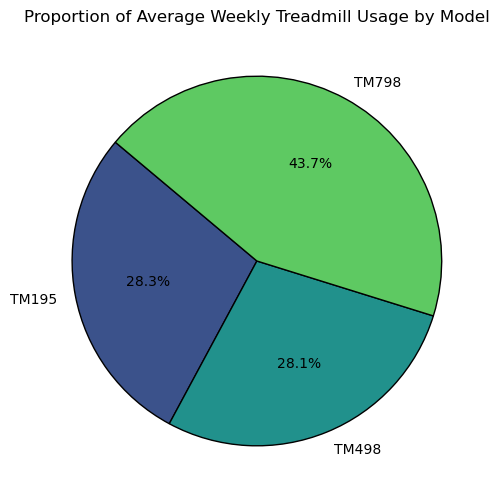

In [39]:
plt.figure(figsize=(10, 6))

usage_counts = df.groupby("Product")["Usage"].mean()
colors = sns.color_palette('viridis', len(usage_counts))
plt.pie(usage_counts, labels=usage_counts.index, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title('Proportion of Average Weekly Treadmill Usage by Model')
plt.show()

### Understanding this visual

The pie chart illustrates the proportion of average weekly treadmill usage by model, helping us understand which treadmill models are used the most by customers.

This visualization is valuable for stakeholders because it provides insights into product engagement and customer preferences, enabling the marketing and sales teams to optimize strategies for promotions, product recommendations, and customer retention.

- *TM798*
  - The TM798 model accounts for the largest share of weekly usage (43.7%), making it the most frequently used treadmill among customers.
  - This suggests that customers who own the TM798 treadmill tend to use it more regularly than those who own the TM195 or TM498 models.
- *How will this help the Marketing & Sales Team*
  -  Since TM798 users are more engaged, marketing can emphasize its durability, advanced features, or superior performance to attract more buyers.
  -  Since TM798 is used the most, marketing can position it as a premium, high-performance option for committed fitness enthusiasts.

- *TM195 and TM498*
  - TM195 (28.3%) and TM498 (28.1%) have similar but lower weekly usage.
  - This suggests that customers using these models may be less engaged in regular treadmill workouts, or that these models cater to a different type of user (e.g., casual exercisers).

- *How will this help the Marketing & Sales Team*
  -  Marketing teams can analyze whether lower usage is due to product limitations, lack of motivation, or different customer needs by getting their feedbacks.
  -  If TM195 and TM498 users are less engaged, companies can introduce motivational programs, fitness challenges, or loyalty incentives to increase treadmill usage.
  -  Moreover, getting their feedback will allow them to report back to the company to check which areas of their treadmill they can improve on so that they can attract more customers and increase customer retention.

## 9) Are there any differences in miles from each gender?

C:\Users\User\AppData\Local\Temp\ipykernel_11352\1202220278.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mile_median = df.groupby("Gender")["Miles"].median()


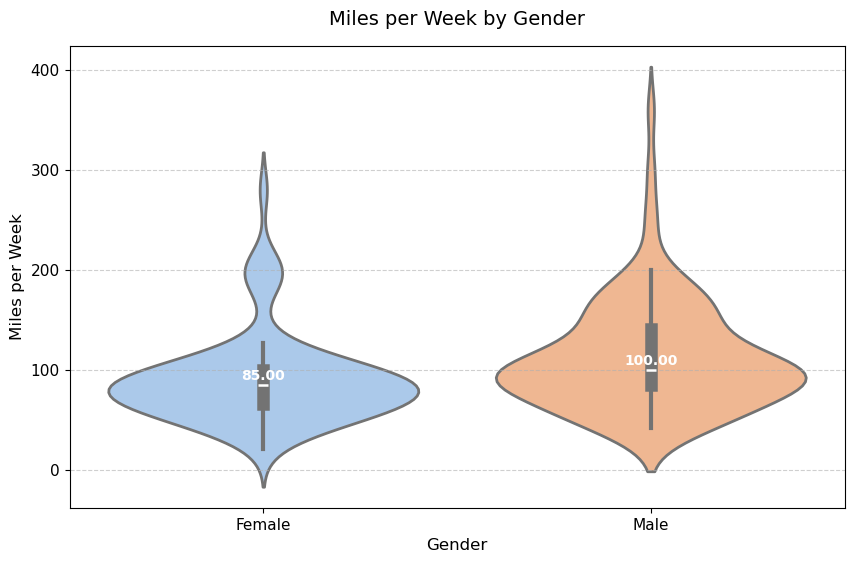

In [88]:
plt.figure(figsize=(10, 6))

sns.violinplot(data=df, x='Gender', y='Miles', palette='pastel', linewidth=2, hue='Gender')
mile_median = df.groupby("Gender")["Miles"].median()
for i, median in enumerate(mile_median):
    plt.text(i, median + 2, f'{median:.2f}', 
             ha='center', va='bottom', 
             fontsize=10, color='white', fontweight='bold')
    
plt.title('Miles per Week by Gender', fontsize=14, pad=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Miles per Week', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


### Understanding this visual
The violinplot compare male and female customers in terms of miles run per week, providing insights into treadmill usage patterns by gender.

This visualization is valuable for stakeholders as it helps identify differences in workout intensity between male and female customers, allowing the marketing and sales teams to tailor their strategies for different customer segments.

- *Male*
  - The median miles run per week is higher for males (100) compared to females (85), meaning that, on average, male customers tend to run more frequently and for longer distances.
  - The range for males is wider, indicating greater variability in running distances, suggesting some male customers are highly engaged while others have moderate usage.
  - There are outliers on the higher end for male customers, showing that some male users run significantly longer distances compared to the majority

- *How will this help the Marketing & Sales Team?*
    - Since males run longer distances, marketing can highlight durable, high-end models with advanced features like shock absorption, incline settings, and performance tracking.
    -  Since higher mileage can lead to more treadmill wear and tear, sales teams can recommend extended warranties, treadmill servicing plans, or replacement parts to male customers.

- *Female*
    - Female customers have a lower median miles (85) run per week compared to males, indicating less frequent or shorter treadmill workouts.
    - However, the violin plot indicates that a small handful of women do clock in around 200 miles.

- *How will this help the Marketing & Sales Team?*

    - Female customers might be more interested in running for overall wellness rather than performance. Marketing can emphasize weight loss programs, low-impact treadmill workouts, and personalized coaching plans.

## 10) Does Education Level affect the usage of the treadmill?

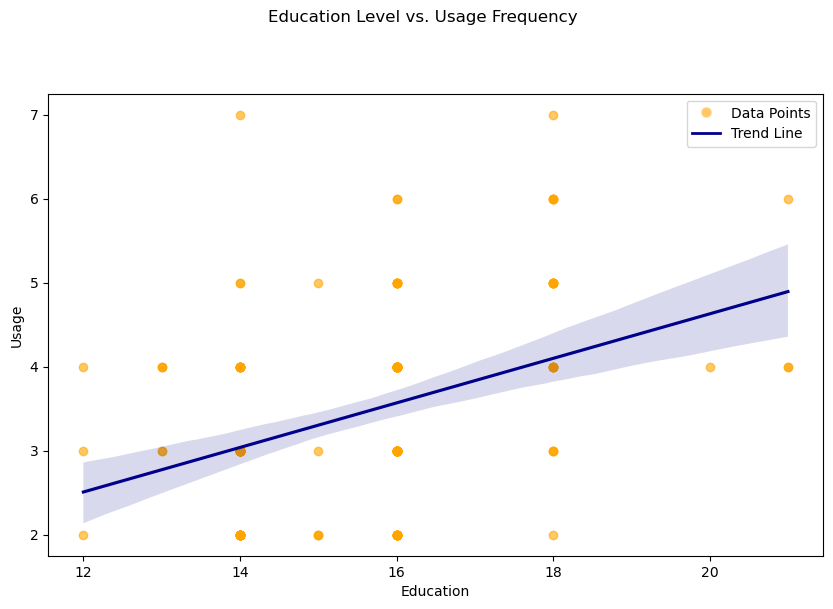

In [148]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Education', y='Usage', scatter_kws={'alpha':0.6, 'label': 'Data Points', 'color':'orange'}, line_kws={'color':'#00008B'})
scatter_legend = plt.Line2D([0], [0], marker='o', color='w', markersize=8, markerfacecolor='orange', alpha=0.6, label='Data Points')
line_legend = plt.Line2D([0], [0], color='#00008B', linewidth=2, linestyle='-', label='Trend Line')
plt.suptitle('Education Level vs. Usage Frequency', y=1.02)
plt.legend(handles = [scatter_legend, line_legend])
plt.show()


### Understanding this visual

This scatter plot examines whether customers with more years of education tend to use their treadmills more frequently, providing insights into how education level influences treadmill engagement.

If higher-educated individuals tend to use their treadmills more frequently, this insight can help with advertising, content strategies, and engagement campaigns to encourage long-term treadmill usage across different education levels.

- *Customers with Higher Education Level Tend to Use Their Treadmills More Frequently*
    - The scatter plot with a regression trend line indicates a slight positive correlation, meaning that customers with higher education levels tend to use their treadmills more often.
    - While the correlation is not extremely strong, the trend suggests that education level is one of several factors influencing treadmill usage.

- *How will this help the Marketing & Sales Team?*
  - Customers with higher education levels may respond well to data-driven insights and health information.
  - Marketing can create science-backed fitness blogs, expert video sessions, and personalized fitness newsletters to keep this group engaged.


## 11) What is the product sales of every treadmill model in each branch?

C:\Users\User\AppData\Local\Temp\ipykernel_11352\2650878604.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = df.groupby(["Branch", "Product"]).size().unstack()


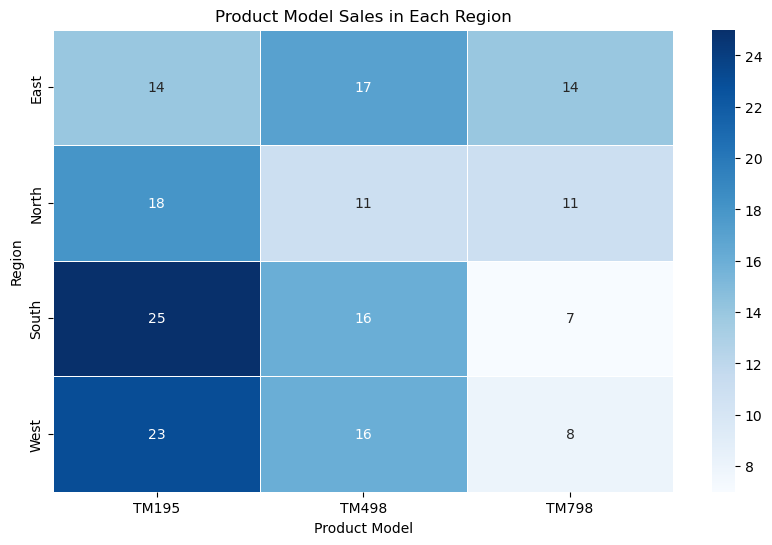

In [45]:
plt.figure(figsize=(10, 6))
distribution = df.groupby(["Branch", "Product"]).size().unstack()
ax = sns.heatmap(distribution, annot=True, fmt='d', cmap='Blues', linewidths=0.5)

# Titles and labels
plt.title('Product Model Sales in Each Region')
plt.xlabel('Product Model')
plt.ylabel('Region')

plt.show()

### Understanding this visual

This heatmap effectively highlights the relationship between branch location and treadmill model preference, showing how sales volumes vary across different regions.

This visualization helps stakeholders identify patterns in customer preferences across different locations, enabling them to refine marketing strategies, optimize inventory, and maximize sales performance.

- Some branches show a dominance of certain treadmill models, indicating regional preferences in customer buying behavior. In this heatmap, TM195 has shown highest sales in West (23) and the South Region (25).

- This could be due to local demographics, income levels, fitness trends, or marketing effectiveness.

- Whereas a low sales volume for a particular model in a branch may suggest a mismatch between customer needs and the product offering. For example, TM798 is underperforming in the West (8) and South (7) branch.

- *How will this help the Marketing & Sales Team?*

    - Since TM798 is highly popular in the West and South Region, marketing campaigns in that area can focus on reinforcing that trend.
      
    - Local advertisements, gym partnerships, and fitness influencer promotions can be tailored to highlight the most preferred models.
 
    - If a treadmill underperforms in a branch, the sales team can investigate whether it is due to pricing, lack of awareness, or customer preferences.
 
    - Alternative strategies such as discounts and promotions can be introduced to increase sales.


## 12) Are there any correlation between purchasing of treadmill and annual income of each customers?

C:\Users\User\AppData\Local\Temp\ipykernel_11352\1880791342.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_income = df.groupby("Product")["Income"].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_11352\1880791342.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  treadmill_purchases = df.groupby('Product').size()


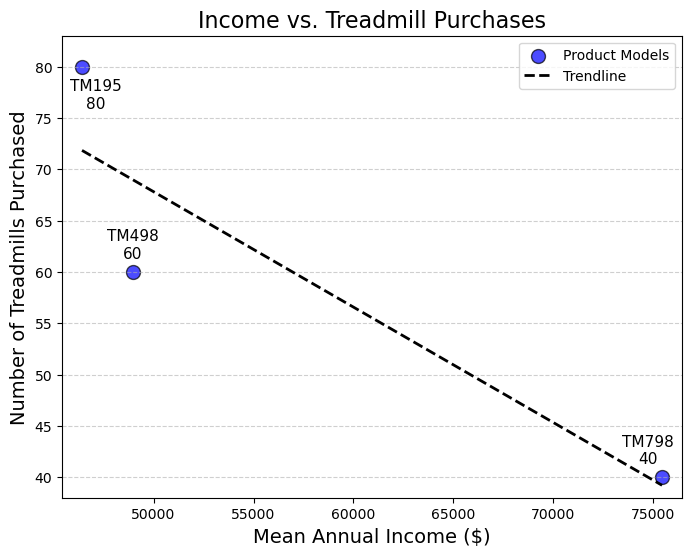

In [46]:
mean_income = df.groupby("Product")["Income"].mean()
treadmill_purchases = df.groupby('Product').size()
model = ["TM195", "TM498", "TM798"]

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(mean_income, treadmill_purchases, color='b', s=100, edgecolors='black', alpha=0.7, label="Product Models")

m, b = np.polyfit(mean_income, treadmill_purchases, 1)  
x_trend = np.linspace(min(mean_income), max(mean_income), 100)  
ax.plot(x_trend, m * x_trend + b, color='black', linestyle='--', linewidth=2, label="Trendline")  

for i in range(len(model)):
    model_name = model[i]
    income = mean_income.iloc[i]  
    purchases = treadmill_purchases.iloc[i] 
    if model_name == 'TM195':  
        xytext_offset = (10, -30)
    elif model_name == 'TM498':  
        xytext_offset = (0, 10)
    elif model_name == 'TM798':  
        xytext_offset = (-10, 10)
        
    ax.annotate(f"{model_name}\n{purchases}", 
                (income, purchases), 
                textcoords="offset points", 
                xytext=xytext_offset,  
                ha='center', fontsize=11, color='black', 
                bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.3'))


ax.set_xlabel("Mean Annual Income ($)", fontsize=14)
ax.set_ylabel("Number of Treadmills Purchased", fontsize=14)
ax.set_title("Income vs. Treadmill Purchases", fontsize=16)
ax.set_xlim(min(mean_income) - 1000, max(mean_income) + 1000)
ax.set_ylim(min(treadmill_purchases) - 2, max(treadmill_purchases) + 3)
ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.legend()
plt.show()

### Understanding this visual

This scatter plot with a trendline examines how mean annual income influences treadmill purchases across different product models.

The trendline indicates a negative correlation between income and treadmill purchases.
As income increases, the number of treadmills purchased tends to decrease.
TM195 (low-cost model) is most popular in lower-income brackets, while TM798 (high-cost model) is preferred by higher-income customers, but in smaller quantities.

Each treadmill model appeals to a distinct income group.
- TM195 → Budget-friendly, mass-market appeal
- TM498 → Mid-tier, balanced features vs. price
- TM798 → Premium, fewer purchases but higher unit price
 
Higher-income individuals may prefer high-end fitness solutions such as premium workout equipment to maintain or improve their fitness as they see the importance of keeping fit and strong.

Lower-income customers may see treadmills as a cost-effective way to exercise at home, avoiding recurring gym fees.

- This shows that **affordability is a major factor influencing treadmill purchases.**

- *How will this help the Marketing & Sales Team?*
    - Premium treadmills (TM798) should be marketed differently, emphasizing advanced features, durability, and luxury to appeal to wealthier customers.
    - Lower-cost treadmills (TM195) can be promoted with affordability, installment plans, and budget-friendly fitness solutions.
    - More financing options, discounts, and promotional bundles should be offered to lower-income customers to encourage purchases.
    - Advertising for TM195 and TM498 should focus on long-term savings and convenience of home workouts vs. gym memberships to boost sales and increase customer satisfaction of each products.


## 13) What is the age distribution of customers?

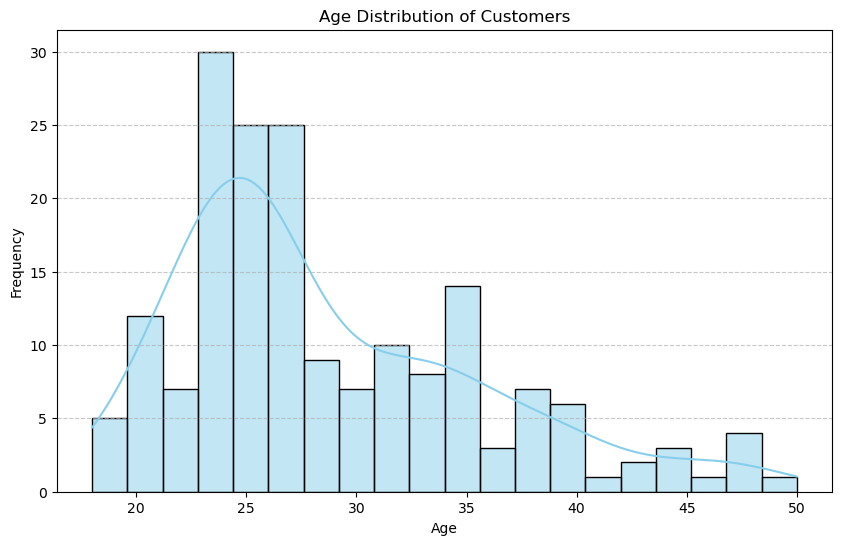

In [47]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
ax.set_title('Age Distribution of Customers')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Understanding this visual

This histogram with a Kernel Density Estimate (KDE) curve provides a clear view of the age distribution of treadmill customers.
Most customers fall within the 20-35 age range, making up the largest portion of treadmill buyers. While the spread of the histogram indicates some customers in older age groups, but they form a smaller proportion.

- *Majority of Buyers Are Young and Middle-Aged Adults*
    - The 20-40 age group dominates treadmill purchases, forming the largest peak in the distribution.
    - There is a linear drop-off after 40 years old, suggesting fewer older individuals buy treadmills.

- *Possible Reasons*
    - Young and middle-aged adults are more fitness-conscious, looking for home workout solutions.
    - Work schedules may limit their gym visits, making a treadmill a convenient alternative.
- *How will this help the Marketing & Sales Team?*
    - Target digital ads and social media campaigns toward younger demographics. For example, collaborating with their popular and favourite fitness influencers to endorse their product.
    - Social media marketing should be the primary channel, using Instagram, TikTok, and YouTube fitness influencers.
    - Highlight convenience, efficiency, and home-based fitness solutions for working professionals in their advertisement.
    - Consider separate marketing for older adults, emphasizing joint-friendly treadmill features, heart rate monitoring, and lower-impact settings.
    - Moreover, introduce treadmill models with senior-friendly features, such as cushioned decks and lower speed settings in their marketing campaings.
    - OR collaborate with healthcare professionals or wellness brands to promote treadmills for older age groups.

# Dashboard

## i) Product Performance and Regional Insights

C:\Users\User\AppData\Local\Temp\ipykernel_11352\1396927127.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby('Product')['Income'].median()  # Get median income per product
C:\Users\User\AppData\Local\Temp\ipykernel_11352\1396927127.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = df.groupby(["Branch", "Product"]).size().unstack()
C:\Users\User\AppData\Local\Temp\ipykernel_11352\1396927127.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser

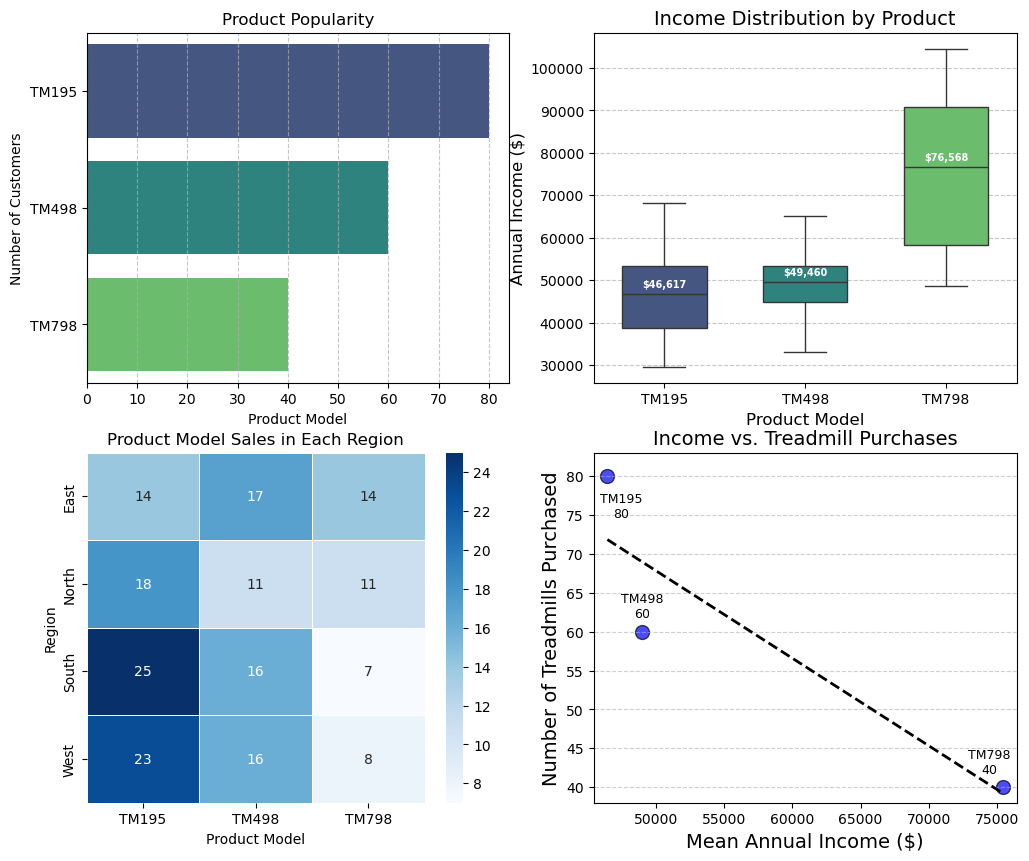

In [150]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Product Popularity
sns.countplot(y='Product', data=df, hue='Product', palette='viridis', legend=False, ax = axes[0, 0])
axes[0, 0].set_title('Product Popularity')
axes[0, 0].set_xlabel('Product Model')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].grid(axis='x', linestyle='--', alpha=0.7) 


#Box plot
ax = sns.boxplot(
    x='Product', 
    y='Income', 
    data=df, 
    hue = 'Product',
    palette='viridis',
    legend = False,
    showfliers=False,  
    width=0.6,
    ax = axes[0,1]
)

medians = df.groupby('Product')['Income'].median()  
for i, median in enumerate(medians):
    ax.annotate(f'${median:,.0f}',  
                xy=(i, median), 
                xytext=(0, 5),  
                textcoords='offset points', 
                ha='center', 
                fontsize=7, 
                fontweight='bold', 
                color='white')

axes[0,1].set_title('Income Distribution by Product', fontsize=14)
axes[0,1].set_xlabel('Product Model', fontsize=12)
axes[0,1].set_ylabel('Annual Income ($)', fontsize=12)
axes[0,1].grid(axis='y', linestyle='--', alpha=0.7)  


#Heatmap
distribution = df.groupby(["Branch", "Product"]).size().unstack()
ax = sns.heatmap(distribution, annot=True, fmt='d', cmap='Blues', linewidths=0.5, ax=axes[1,0])
axes[1,0].set_title('Product Model Sales in Each Region')
axes[1,0].set_xlabel('Product Model')
axes[1,0].set_ylabel('Region')



# Linear Regression
mean_income = df.groupby("Product")["Income"].mean()
treadmill_purchases = df.groupby('Product').size()
model = ["TM195", "TM498", "TM798"]
axes[1,1].scatter(mean_income, treadmill_purchases, color='b', s=100, edgecolors='black', alpha=0.7, label="Product Models")
m, b = np.polyfit(mean_income, treadmill_purchases, 1)  
x_trend = np.linspace(min(mean_income), max(mean_income), 100)  
axes[1,1].plot(x_trend, m * x_trend + b, color='black', linestyle='--', linewidth=2, label="Trendline")  
for i in range(len(model)):
    model_name = model[i]
    income = mean_income.iloc[i] 
    purchases = treadmill_purchases.iloc[i]  
    if model_name == 'TM195': 
        xytext_offset = (10, -30)
    elif model_name == 'TM498':  
        xytext_offset = (0, 10)
    elif model_name == 'TM798': 
        xytext_offset = (-10, 10)

    axes[1,1].annotate(f"{model_name}\n{purchases}", 
                (income, purchases), 
                textcoords="offset points", 
                xytext=xytext_offset,  
                ha='center', fontsize=9, color='black', 
                bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.3'))


axes[1,1].set_xlabel("Mean Annual Income ($)", fontsize=14)
axes[1,1].set_ylabel("Number of Treadmills Purchased", fontsize=14)
axes[1,1].set_title("Income vs. Treadmill Purchases", fontsize=14)
axes[1,1].set_xlim(min(mean_income) - 1000, max(mean_income) + 1000)
axes[1,1].set_ylim(min(treadmill_purchases) - 2, max(treadmill_purchases) + 3)
axes[1,1].grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

### Purpose of this dashboard

This dashboard provides key business insights on treadmill sales, customer income distribution, and regional performance. It helps stakeholders make data-driven decisions regarding product strategy, marketing, and regional sales optimization.

**1)  Product Popularity Analysis (Top-Left Chart)**

What It Shows: The number of customers for each treadmill model.

Insight: TM195 is the most popular treadmill, followed by TM498 and TM798.

Business Value: Helps identify best-selling products and prioritize inventory.
If TM798 is underperforming, marketing efforts could be adjusted to boost sales.
Stakeholders can forecast demand and allocate production resources efficiently.

**2) Income Distribution by Product (Top-Right Boxplot)**

What It Shows: The income levels of customers purchasing each treadmill model.

Insight:
TM798 buyers have the highest average income (~$76,568).

TM195 buyers have the lowest average income (~$46,617).


Business Value:
Helps in targeting the right customer segments for each product.
TM195 should be marketed towards budget-conscious buyers, while TM798 should focus on premium customers.
Pricing strategies can be adjusted—premium features for high-income buyers, discounts for budget-conscious consumers.

**3) Regional Product Sales Performance (Bottom-Left Heatmap)**

What It Shows: Each of the Treadmill model sales by region.

Insight:
TM195 sells best in the South (25 units) and West (23 units).
TM798 has lower sales across all regions.
TM498 has consistent but moderate sales across regions.

Business Value:
Optimizes regional inventory distribution—more TM195 units should be stocked in the South and West.
Identifies underperforming regions where additional promotions are needed.
Regional marketing campaigns can be tailored—for example, increasing TM798 promotions in the North and South regions where sales are lowest.


**4) Income vs. Treadmill Purchases (Bottom-Right Scatter Plot)**

What It Shows: The relationship between income and treadmill purchases.

Insight:
Negative correlation—higher-income customers buy fewer treadmills.
TM195, the most popular model, is purchased by lower-income customers (~$46K).

TM798, the least popular, is preferred by higher-income customers (~ $75K).

Business Value:
If high-income customers are less likely to buy, premium features or luxury treadmill branding could be introduced to attract them.
Lower-income customers are more price-sensitive, so discounts and financing options could further boost sales for TM195.
Helps align advertising strategies—budget-conscious vs. premium buyers.



-->  By leveraging these insights, stakeholders can refine marketing strategies, optimize inventory, and increase sales across different customer segments.

## ii) Usage Trends Among Customers

C:\Users\User\AppData\Local\Temp\ipykernel_11352\270729850.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_counts = df.groupby("Product")["Usage"].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_11352\270729850.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mile_median = df.groupby("Gender")["Miles"].median()


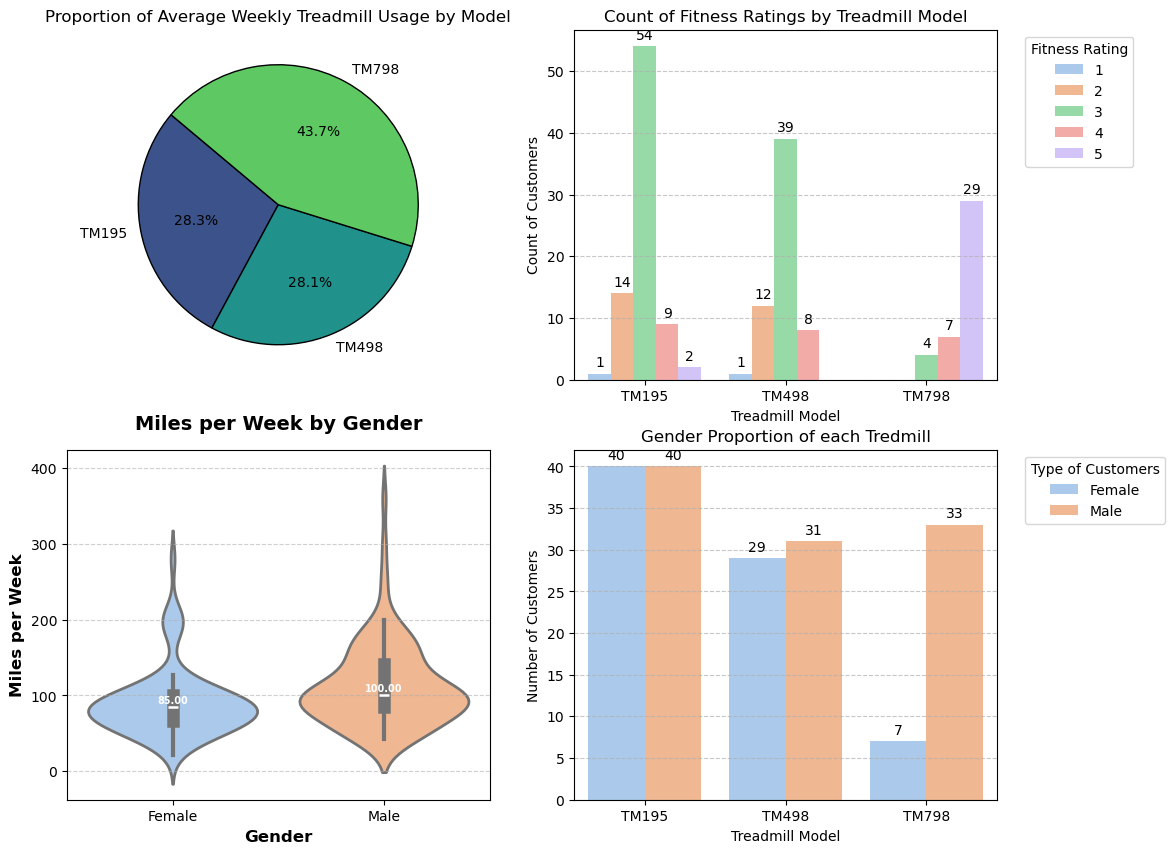

In [96]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
usage_counts = df.groupby("Product")["Usage"].mean()
colors = sns.color_palette('viridis', len(usage_counts))
axes[0,0].pie(usage_counts, labels=usage_counts.index, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
axes[0,0].set_title('Proportion of Average Weekly Treadmill Usage by Model')


sns.violinplot(data=df, x='Gender', y='Miles', palette='pastel', linewidth=2, ax = axes[1,0], hue='Gender')

# Calculate and annotate median values
mile_median = df.groupby("Gender")["Miles"].median()
for i, median in enumerate(mile_median):
    axes[1,0].text(i, median + 2, f'{median:.2f}', 
             ha='center', va='bottom', 
             fontsize=7, fontweight='bold', color='white')

# Set title and labels with better formatting
axes[1,0].set_title('Miles per Week by Gender', fontsize=14, fontweight='bold', pad=15)
axes[1,0].set_xlabel('Gender', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Miles per Week', fontsize=12, fontweight='bold')
axes[1,0].grid(axis='y', linestyle='--', alpha=0.6)

ax = sns.countplot(data=df, x='Product', hue='Fitness', palette = 'pastel', ax = axes[0,1])
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color = 'black')

axes[0,1].set_title('Count of Fitness Ratings by Treadmill Model')
axes[0,1].set_xlabel('Treadmill Model')
axes[0,1].set_ylabel('Count of Customers')
axes[0,1].legend(title='Fitness Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].grid(axis='y', linestyle='--', alpha=0.7)

ax = sns.countplot(data=df, x='Product', hue='Gender', palette='pastel', ax = axes[1,1])
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color = 'black')
axes[1,1].set_title('Gender Proportion of each Tredmill')
axes[1,1].set_xlabel('Treadmill Model')
axes[1,1].set_ylabel('Number of Customers')
axes[1,1].legend(title='Type of Customers', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Purpose of this dashboard

This dashboard provides insights into treadmill usage patterns, customer demographics, and satisfaction levels. It helps stakeholders in marketing, sales, and product development make informed decisions.

**1) Treadmill Usage by Model (Top-Left Pie Chart)**

What It Shows: The proportion of average weekly treadmill usage for each model.

Insight:
TM798 has the highest weekly usage (43.7%), suggesting strong engagement.
TM195 and TM498 have similar usage rates (~28%).

Business Value:
TM798 users are highly engaged—potential for premium services or loyalty programs.
TM195 and TM498 may need feature improvements or additional promotions to boost usage.

**2) Fitness Ratings by Treadmill Model (Top-Right Bar Chart)**

What It Shows: Customer satisfaction ratings for each treadmill model.

Insight:
TM195 and TM498 receive mostly fitness ratings of 3 or 4.
TM798 has a significant number of high (5) ratings, suggesting superior quality.

Business Value:
TM798’s high satisfaction makes it a premium offering, justifying higher pricing or additional features.
TM195 and TM498 could be redesigned or repositioned to improve customer perception.

**3) Miles per Week by Gender (Bottom-Left Violin Plot)**

What It Shows: Weekly treadmill usage in miles, split by gender.

Insight:
Males have a slightly higher median usage (100 miles) than females (85 miles).
Both genders show a wide range of usage, with some high-end users exceeding 300 miles/week.

Business Value:
Male customers may be a key demographic for performance-oriented marketing.
Female customers could benefit from targeted engagement strategies like wellness programs or community challenges.

**4) Gender Proportion by Treadmill Model (Bottom-Right Bar Chart)**

What It Shows: The gender distribution of treadmill purchases.

Insight:
TM195 has a balanced male-female customer base.
TM498 is slightly more popular among males.
TM798 is heavily male-dominated, with very few female buyers.

Business Value:
If TM798 wants to expand its market share, it should introduce features appealing to female customers.
Marketing campaigns should be tailored—balanced messaging for TM195, performance-driven for TM798.

--> By using these insights, stakeholders can optimize product design, tailor marketing efforts, and improve customer engagement strategies.

## Customer Demographic

C:\Users\User\AppData\Local\Temp\ipykernel_11352\953999288.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_income_per_region = df.groupby("Branch")["Income"].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_11352\953999288.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  married_percentage = (df[df['MaritalStatus'] == 'Partnered'].groupby('Branch').size() / df.groupby('Branch').size()) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_11352\953999288.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False

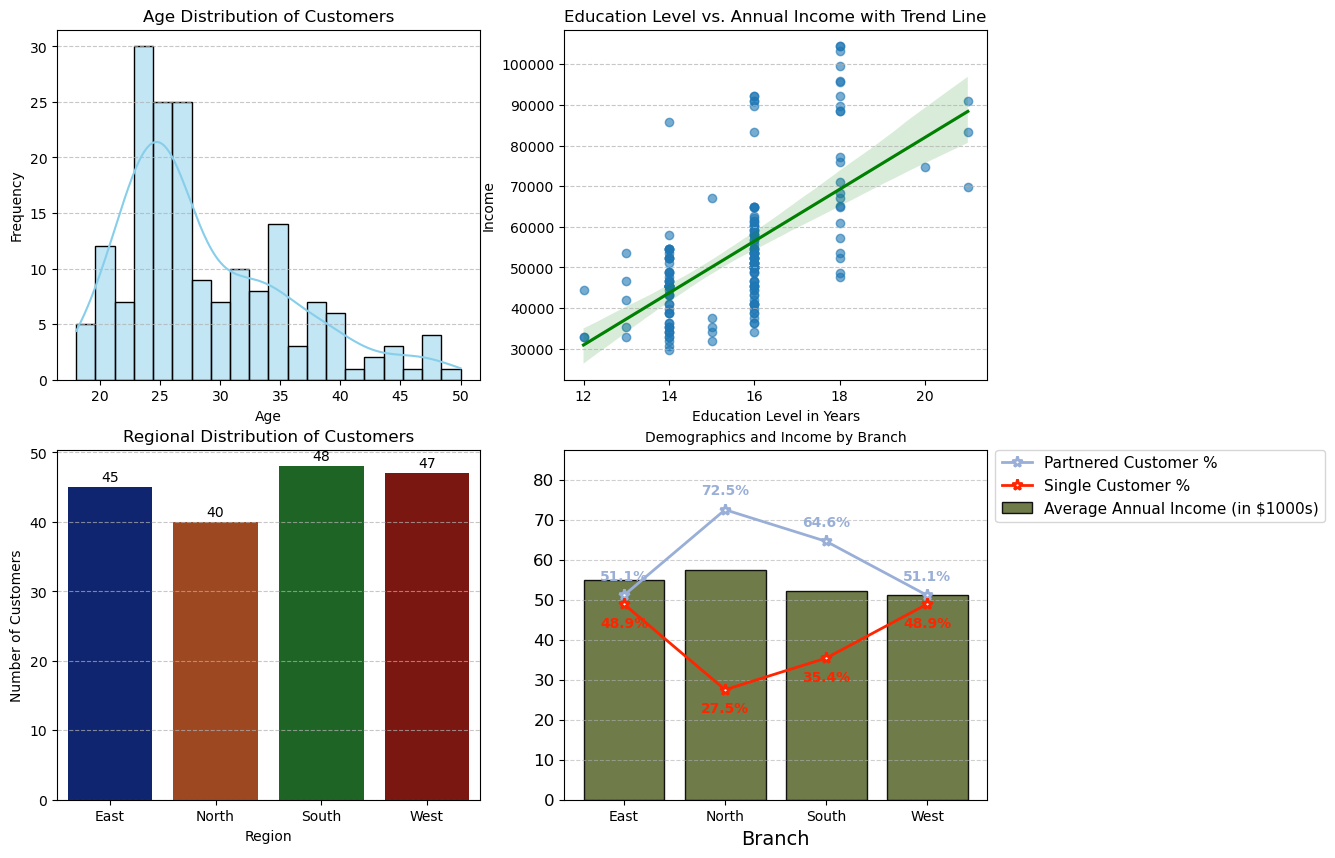

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', ax = axes[0,0])
axes[0,0].set_title('Age Distribution of Customers')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(axis='y', linestyle='--', alpha=0.7)

sns.regplot(data=df, x='Education', y='Income', scatter_kws={'alpha':0.6, 'label': 'Data Points'}, line_kws={'color':'green'}, ax=axes[0,1])

# Titles and labels
axes[0,1].set_title('Education Level vs. Annual Income with Trend Line')
axes[0,1].set_xlabel('Education Level in Years')
axes[0,1].set_ylabel('Income')
axes[0,1].grid(axis='y', linestyle='--', alpha=0.7)


branch_counts = df['Branch'].value_counts().reset_index()
branch_counts.columns = ['Branch', 'Count']
branch_counts = branch_counts.sort_values(by='Count', ascending=False)
df['Branch'] = pd.Categorical(df['Branch'], categories=branch_counts['Branch'], ordered=True)
ax = sns.countplot(x='Branch', data=df, hue='Branch', palette='dark', ax=axes[1,0])
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=10, color='black')
    
axes[1,0].set_title('Regional Distribution of Customers')
axes[1,0].set_xlabel('Region')
axes[1,0].set_ylabel('Number of Customers')
axes[1,0].grid(axis='y', linestyle='--', alpha=0.7)

branches = df['Branch'].unique() 
average_income_per_region = df.groupby("Branch")["Income"].mean()
married_percentage = (df[df['MaritalStatus'] == 'Partnered'].groupby('Branch').size() / df.groupby('Branch').size()) * 100
single_percentage = (df[df['MaritalStatus'] == 'Single'].groupby('Branch').size() / df.groupby('Branch').size()) * 100

axes[1,1].bar(average_income_per_region.index,  
       average_income_per_region.values / 1000,  # height (Income in $1000s)
       label="Average Annual Income (in $1000s)", 
       color='#5F6D34', alpha=0.9, edgecolor='black')

axes[1,1].plot(married_percentage, 
        marker='*', 
        linestyle='-', 
        color= '#99AFD7', 
        linewidth=2, 
        markersize=8, 
        label="Partnered Customer %", 
        markerfacecolor='white', 
        markeredgewidth=2, 
        markeredgecolor='#99AFD7')

axes[1,1].plot(single_percentage, 
        marker='*', 
        linestyle='-', 
        color='#FF2500', 
        linewidth=2, 
        markersize=8, 
        label="Single Customer %", 
        markerfacecolor='white', 
        markeredgewidth=2, 
        markeredgecolor='#FF2500')

for i, txt in enumerate(married_percentage):
    axes[1,1].text(i, txt + 3, f"{txt:.1f}%", ha='center', va='bottom', 
            fontsize=10, fontweight='bold', color='#99AFD7')

for i, txt in enumerate(single_percentage):
    axes[1,1].text(i, txt - 3, f"{txt:.1f}%", ha='center', va='top', 
            fontsize=10, fontweight='bold', color='#FF2500')


axes[1,1].set_ylim(0, max(single_percentage.max(), married_percentage.max()) + 15)
# Labels and title
axes[1,1].set_xlabel("Branch", fontsize=14)
axes[1,1].set_title("Demographics and Income by Branch", fontsize=10, fontweight='light')
axes[1,1].legend(frameon=True, fontsize=11, loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)
axes[1,1].tick_params(axis='y', labelsize=12)
axes[1,1].grid(axis='y', linestyle='--', alpha=0.6)  

plt.show()

### Purpose of this dashboard

This dashboard provides multiple valuable insights for the Marketing & Sales team, helping them develop targeted sales strategies, optimize marketing efforts, and understand customer demographics better. 

**1) Age Distribution of Customers (Top-Left Chart)**

What it shows: 
This histogram shows the distribution of customer ages, revealing which age groups make up the majority of the customer base.

Insight: 
The peak appears to be around 25-30 years old, indicating that this age group represents the largest segment of customers.

Business Value:
Promotions and advertisements should target this young adult audience, possibly highlighting affordability, technology, and performance in treadmill marketing.
The Sales team can focus on gym partnerships or social media campaigns, as younger audiences are highly engaged online.

**2) Education Level vs. Annual Income (Top-Right Chart)**

What it shows:
This scatter plot with a trend line shows the relationship between education level and income.

Insight:
A positive correlation is observed: customers with higher education levels tend to have higher incomes.

Business Value:
Higher-income customers may be more inclined to purchase premium products.
Marketing campaigns could highlight advanced treadmill features for high-income earners, while offering financing options for lower-income groups.
The Sales team can use this insight to recommend products based on a customer's financial capacity.

**3)Regional Distribution of Customers (Bottom-Left Chart)**

What it shows: 
This bar chart presents the number of customers in each region (East, North, South, West).

Insight:
South has the highest number of customers (48), followed by West (47) and East (45), while North has the lowest (40).

Business Value:
South and West branches should be given higher inventory to meet demand.
North branch requires more attention—possibly through localized marketing efforts, partnerships, or promotional discounts to increase customer engagement.
The Sales team can investigate why North has fewer customers and implement strategies to drive foot traffic by asking their customers for their feedback on their products.

**4) Demographics and Income by Branch (Bottom-Right Chart)**

What it shows:
This chart provides a branch-wise breakdown of three key metrics:
Partnered Customer % (Blue Line)
Single Customer % (Red Line)
Average Annual Income (Green Bars)

Insight:
North branch has the highest proportion of partnered customers (72.5%), meaning promotions should target families and couples with bundled offers.
West and East branches have a balanced split of partnered and single customers, requiring a versatile marketing approach.
South branch shows moderate income levels but has a significant single customer base (35.4%), meaning individual-oriented promotions like personal training sessions or fitness challenges may perform well. 

Business Value:
Should target families and couples with bundled offers depending on the annual income of that area. West and East branches have a balanced split of partnered and single customers, requiring a versatile marketing approach.
Since the annual average income is roughly the same for all brances, marketing and sales team can find where lower and higher income individuals are staying and promote their products accordingly.

--> By leveraging these insights, the team can implement more effective, data-driven marketing and sales strategies to boost customer engagement and increase revenue.